# Сортировка слиянием MergeSort

In [16]:
# MergeSort
# example based on: https://www.geeksforgeeks.org/python-program-for-merge-sort/
 
def merge_sort(arr, l, r):
    """
    l is for left index and r is right index of the
    sub-array of arr to be sorted
    """
    if l < r:
 
        # Same as (l + r) // 2, but avoids overflow for large l 
        m = l + (r - l) // 2
 
        # Sort first and second halves
        merge_sort(arr, l, m)
        merge_sort(arr, m+1, r)
        merge(arr, l, m, r)
    
    
def merge(arr, l, m, r):
    """
    Merges two subarrays of arr[].
    First subarray is arr[l..m]
    Second subarray is arr[m+1..r]
    """
    
    # create temp arrays
    L = arr[l:m + 1]
    R = arr[m + 1:r + 1]
    
    n1 = len(L)
    n2 = len(R)
    
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
    
    if n1 < n2:
        len_i = n2
        list_i = R
        idx_i = j
    else:
        len_i = n1
        list_i = L
        idx_i = i
         
    while idx_i < len_i:
        arr[k] = list_i[idx_i]
        idx_i += 1
        k += 1
    '''    
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

    '''



In [17]:
# test
arr = [12, 11, 13, 5, 6, 7]
n = len(arr)
print(f"Given: {arr}")
 
merge_sort(arr, 0, n-1)
print(f"Sorted: {arr}")

Given: [12, 11, 13, 5, 6, 7]
Sorted: [5, 6, 7, 11, 12, 13]


# Quicksort

Этот алгоритм, чаще называемый просто «быстрая сортировка» (англ. Quicksort) придуман английским ученым Чарльзом Хоаром в 1960 году.

Выберем некоторый элемент q, называемый барьерным элементом. Разобьем массив на две части, переупорядочив его элементы. В первой части соберем элементы, меньшие или равные q, а во второй части — большие или равные q. Теперь достаточно отсортировать обе части, после чего выполнить их конкатенацию безо всякого дополнительного слияния.


In [1]:
def quick_sort(A):
    if len(A) <= 1:
        return A
    else:
        q = random.choice(A)
        L = []
        M = []
        R = []
        for elem in A:
            if elem < q:
                L.append(elem) 
            elif elem > q: 
                R.append(elem) 
            else: 
                M.append(elem)
        return quick_sort(L) + M + quick_sort(R)

In [2]:
def quick_sort(A):
    if len(A) <= 1:
        return A
    else:
        q = random.choice(A)
        L = [elem for elem in A if elem < q]
        M = [q] * A.count(q)
        R = [elem for elem in A if elem > q] 
        return quick_sort(L) + M + quick_sort(R)

Однако, такая реализация алгоритма, требует $O(n)$ дополнительной памяти. Возможна реализация алгоритма сортировки слиянием без использования дополнительной памяти:

In [3]:
def quick_sort(A, l, r):
    if l >= r:
        return 
    else:
        q = random.choice(A[l:r + 1])
        i = l
        j = r
        while i <= j:
            while A[i] < q:
                i += 1
            while A[j] > q:
                j -= 1
            if i <= j: 
                A[i], A[j] = A[j], A[i]
                i += 1
                j -= 1 
                quick_sort(A, l, j)
                quick_sort(A, i, r)

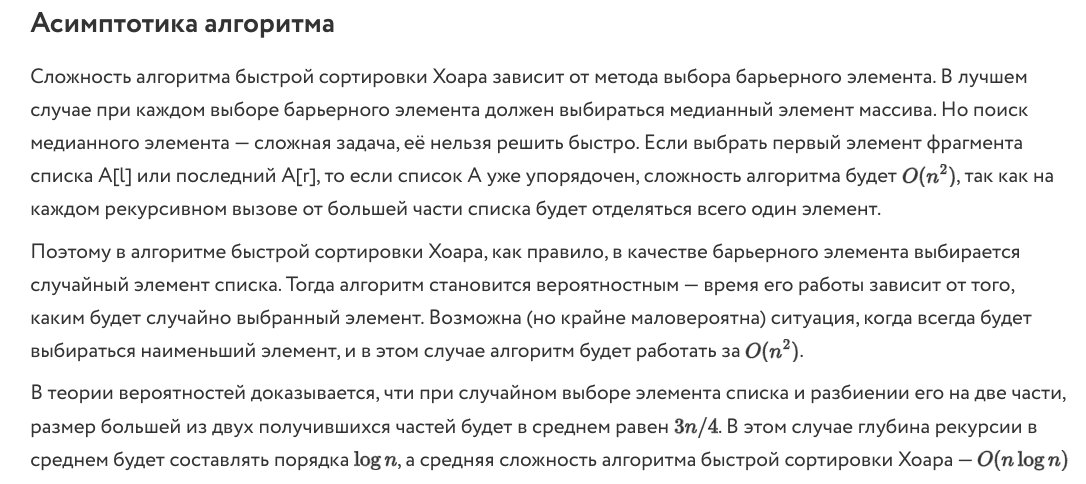

# 

# Куча

Куча представляет собой специализированную древовидную структуру данных, которая удовлетворяет свойству кучи: если A является родительским узлом B, то ключ (значение) узла A упорядочена по ключу узла B с тем же порядком, применяемым по всей куче. Куча может быть дополнительно классифицирована как “максимальная куча” или “минимальная куча”. В максимальной куче ключи родительских узлов всегда больше или равны ключам дочерних узлов, а самый высокий ключ находится в корневом узле. В минимальной куче ключи родительских узлов меньше или равны ключам дочерних узлов, а самый низкий ключ находится в корневом узле.

Куча — это одна из максимально эффективных реализаций абстрактного типа данных, называемого приоритетная очередь, и на самом деле приоритетные очереди часто называют “кучами”, независимо от того, как они могут быть реализованы. Распространенной реализацией кучи является двоичная куча, в которой дерево является полным двоичным деревом.

# Зачем?

Рассмотрим структуру данных, которая поддерживает следующие операции:

-  Добавить элемент в структуру данных.
-  Извлечь из структуры данных наибольший (или наименьший) элемент. Извлеченный элемент удаляется из структуры.
В структуре могут храниться одинаковые элементы.

Если реализовать такую структуру на базе списка, то добавлять элементы можно в конец списка за $O(?)$. Но поиск наибольшего элемента для списка длины $n$ - будет занимать $O(?)$.

Если же хранить элементы в списке упорядочив их по неубыванию, то извлечение наибольшего будет занимать $O(?)$, но добавление элемента в список (т.е. сдвиг элементов, уже находящихся в списке) - $O(?)$.

Специальная структура данных «Куча» (англ. heap) позволяет эти операции выполнять за $O(\log n)$.

В куче элементы хранятся в виде двоичного дерева:
- у элементов есть два потомка - левый и правый. 
- в вершине кучи - один элемент с 2 потомками 

Уровни заполняются в порядке увеличения номера уровня, а сам уровень заполняется **слева направо**. У элементов последнего уровня нет ни одного потомка, возможно, что и у некоторых элементов предпоследнего уровня нет потомков. 

Также в куче может быть один элемент, у которого только один потомок (левый).

При этом для элементов кучи верно следующее свойство 

**каждый из элементов кучи больше или равен всех своих потомков** (max heap) 

либо 

**каждый из элементов кучи меньше или равен всех своих потомков** (min heap). 
В частности это означает, что в вершине кучи хранится наибольший (наименьший) элемент.

На картинке приведен пример правильной кучи из 9 элементов.

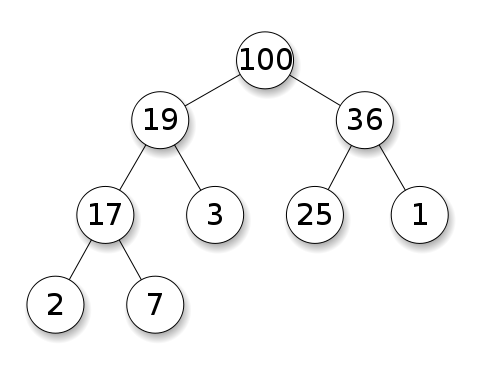

In [3]:
import sys 
  
class MinHeap: 
  
    def __init__(self, maxsize): 
        self.maxsize = maxsize 
        self.size = 0
        self.Heap = [0] * (self.maxsize + 1) 
        self.Heap[0] = -1 * 1e10 
        self.FRONT = 1
  
    def parent(self, pos): 
        return pos // 2
  
    def leftChild(self, pos): 
        return 2 * pos 
  
    def rightChild(self, pos): 
        return (2 * pos) + 1
  
    def isLeaf(self, pos): 
        return pos * 2 > self.size 
  
    def swap(self, fpos, spos): 
        self.Heap[fpos], self.Heap[spos] = self.Heap[spos], self.Heap[fpos] 
  
    def minHeap(self):
        for pos in range(self.size//2, 0, -1): 
            self.minHeapify(pos) 
    
    def minHeapify(self, pos):
        if not self.isLeaf(pos): 
            if (self.Heap[pos] > self.Heap[self.leftChild(pos)] or 
               self.Heap[pos] > self.Heap[self.rightChild(pos)]):
                if self.Heap[self.leftChild(pos)] < self.Heap[self.rightChild(pos)]: 
                    self.swap(pos, self.leftChild(pos)) 
                    self.minHeapify(self.leftChild(pos)) 
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.minHeapify(self.rightChild(pos)) 
  
    def insert(self, element): 
        if self.size >= self.maxsize : 
            return
        self.size += 1
        self.Heap[self.size] = element 
        current = self.size 
        while self.Heap[current] < self.Heap[self.parent(current)]: 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
  
    def print_heap(self): 
        for i in range(1, (self.size // 2) + 1): 
            print(" PARENT : " + str(self.Heap[i]) + " LEFT CHILD : " + 
                                str(self.Heap[2 * i]) + " RIGHT CHILD : " +
                                str(self.Heap[2 * i + 1])) 
  
    
    def remove_head(self): 
  
        popped = self.Heap[self.FRONT] 
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size-= 1
        self.minHeapify(self.FRONT) 
        return popped 

In [4]:
print('The minHeap is ') 
minHeap = MinHeap(15) 
minHeap.insert(5) 
minHeap.insert(3) 
minHeap.insert(17) 
minHeap.insert(10) 
minHeap.insert(84) 
minHeap.insert(19) 
minHeap.insert(6) 
minHeap.insert(22) 
minHeap.insert(9) 
minHeap.minHeap() 

minHeap.print_heap() 
print(f"The Min val is {minHeap.remove_head()}")

The minHeap is 
 PARENT : 3 LEFT CHILD : 5 RIGHT CHILD : 6
 PARENT : 5 LEFT CHILD : 9 RIGHT CHILD : 84
 PARENT : 6 LEFT CHILD : 19 RIGHT CHILD : 17
 PARENT : 9 LEFT CHILD : 22 RIGHT CHILD : 10
The Min val is 3


# Задачи

1. Проверьте, представляет ли массив введённый с клавиатуры список минимальную кучу или нет. 
Если да, то выведите 1, если нет - 0.

In [16]:
a = list(map(int, input().split()))
n = len(a)
k = 1
for i in range((n-1)//2+1):
    left = 2*i + 1
    right = 2*i + 2
    if left < n and a[i] > a[left]:
        k = 0
        break
    if right < n and a[i] > a[right]:
        k = 0
        break
print(k)

  2 5 10 6 8 12 1


0


2. В этой задаче вам даётся три списка студентов:
- владеющих французским языком
- умеющих плавать
- владеющих игрой на фортепиано
Вам необходимо определить список пловцов-пианистов, не владеющих французским.

Формат входных данных:

Три строки. В каждой через пробел записаны номера зачёток студентов. Первая строка посвящена владеющим французским, вторая пловцам и третья пианистам.

Формат выходных данных: 

Одна строка c номерами зачёток через пробел по возрастанию.

Примеры:

Ввод данных:

1 2 5 7 8 9

3 4 8 2 10

10 3 2 8 5

Вывод данных:

3 10

In [14]:
french = list(map(int, input().split()))
swim = list(map(int, input().split()))
play = list(map(int, input().split()))
a = []
for i in range(len(swim)):
    if swim[i] in play and swim[i] not in french:
        a.append(swim[i])
a.sort()
print(*a)

  1 2 5 7 8 9
 3 4 8 2 10
 10 3 2 8 5


3 10


3. Популярная газета объявила конкурс на выбор лучшего фильма, для которого стоит снять продолжение. На выбор читателей было предложено 10 фильмов. Вам предлагается написать эффективную, в том числе и по используемой памяти, программу, которая будет статистически обрабатывать результаты sms-голосования по этому вопросу, чтобы определить популярность того или иного фильма. Следует учитывать, что количество голосов в списке может быть очень велико.

Программа должна вывести список всех фильмов, встречающихся в списке, в порядке убывания (невозрастания) количества отданных за них голосов с указанием этого количества голосов. Название каждого фильма должно быть выведено только один раз.

Формат входных данных: 

На вход программе в первой строчке подается количество пришедших sms-сообщений N. В каждой из последующих N строк записано название фильма. При этом название фильма может содержать пробелы.

Формат выходных данных:

Название фильма и число голосов, отданых за фильм, разделяются пробелом.

Примеры:

Ввод:

6

Белое солнце пустыни

Бриллиантовая рука

Белое солнце пустыни

Белое солнце пустыни

Гараж

Бриллиантовая рука

Вывод:

Белое солнце пустыни 3

Бриллиантовая рука 2

Гараж 1 

In [21]:
n = int(input())

votes = {}
for i in range(n):
    film = input()
    if film in votes:
        votes[film] += 1
    else:
        votes[film] = 1

a = []
for film in votes:
    a.append((-votes[film], film))

a.sort()

for count, film in a:
    print(film, -count)

 6
 Гараж
 Бриллиант
 Бриллиант
 Солнце
 Гараж
 Гараж


Гараж 3
Бриллиант 2
Солнце 1


4. Найдите наименьший диапазон, содержащий хотя бы один элемент из каждого из заданных списков.

Формат входных данных: число N, а далее N списков переменной длины.

4

3 6 8 10 15

1 5 12

4 8 15 16

2 6

Формат выходных данных:

4–6

In [36]:
class MinHeap:
    def __init__(self, maxsize):
        self.maxsize = maxsize
        self.size = 0
        self.val = [0]*(maxsize + 1)
        self.list_idx = [0]*(maxsize + 1)
        self.elem_idx = [0]*(maxsize + 1)
        self.val[0] = -10**18
        self.FRONT = 1

    def parent(self, pos):
        return pos // 2

    def leftchild(self, pos):
        return 2 * pos

    def rightchild(self, pos):
        return 2 * pos + 1

    def isleaf(self, pos):
        return pos * 2 > self.size

    def swap(self, f, s):
        self.val[f], self.val[s] = self.val[s], self.val[f]
        self.list_idx[f], self.list_idx[s] = self.list_idx[s], self.list_idx[f]
        self.elem_idx[f], self.elem_idx[s] = self.elem_idx[s], self.elem_idx[f]

    def min_heapify(self, pos):
        if not self.isleaf(pos):
            left = self.leftchild(pos)
            right = self.rightchild(pos)
            smallest = pos

            if self.val[left] < self.val[smallest]:
                smallest = left
            if right <= self.size and self.val[right] < self.val[smallest]:
                smallest = right

            if smallest != pos:
                self.swap(pos, smallest)
                self.min_heapify(smallest)

    def insert(self, value, l_idx, e_idx):
        if self.size >= self.maxsize:
            return
        self.size += 1
        i = self.size
        self.val[i] = value
        self.list_idx[i] = l_idx
        self.elem_idx[i] = e_idx

        current = i
        while self.val[current] < self.val[self.parent(current)]:
            self.swap(current, self.parent(current))
            current = self.parent(current)

    def get_min(self):
        return self.val[self.FRONT], self.list_idx[self.FRONT], self.elem_idx[self.FRONT]

    def replace_min(self, value, l_idx, e_idx):
        self.val[self.FRONT] = value
        self.list_idx[self.FRONT] = l_idx
        self.elem_idx[self.FRONT] = e_idx
        self.min_heapify(self.FRONT)


n = int(input())
lists = []
for i in range(n):
    lst = list(map(int, input().split()))
    lists.append(lst)

heap = MinHeap(n)
current_max = -10**18

for i in range(n):
    val = lists[i][0]
    heap.insert(val, i, 0)
    if val > current_max:
        current_max = val

bst_low = heap.val[1]
bst_high = current_max
bst_range = bst_high - bst_low

while True:
    min_val = heap.val[1]
    list_i = heap.list_idx[1]
    elem_i = heap.elem_idx[1]

    if current_max - min_val < bst_range:
        bst_low = min_val
        bst_high = current_max
        bst_range = current_max - min_val

    if elem_i + 1 >= len(lists[list_i]):
        break

    next_val = lists[list_i][elem_i + 1]
    heap.replace_min(next_val, list_i, elem_i + 1)

    if next_val > current_max:
        current_max = next_val

print(f"{bst_low}–{bst_high}")

 4
 3 6 8 10 15
 1 5 12
 4 8 15 16
 2 6


4–6


5. Реализуйте алгоритм сортировки кучей. На вход подаётся неотсортированный список, на выходе должен получиться отсортированные список.

Формат входных данных:

6 4 7 1 9 -2

Формат выходных данных:

-2 1 4 6 7 9

In [39]:
class MinHeap:

    def __init__(self, maxsize):
        self.maxsize = maxsize
        self.size = 0
        self.Heap = [0] * (self.maxsize + 1)
        self.Heap[0] = -1 * 1e10
        self.FRONT = 1

    def parent(self, pos):
        return pos // 2

    def leftchild(self, pos):
        return 2 * pos

    def rightchild(self, pos):
        return (2 * pos) + 1

    def isleaf(self, pos):
        return pos * 2 > self.size

    def swap(self, fpos, spos):
        self.Heap[fpos], self.Heap[spos] = self.Heap[spos], self.Heap[fpos]

    def minheap(self):
        for pos in range(self.size//2, 0, -1):
            self.minheapify(pos)

    def minheapify(self, pos):
        if not self.isleaf(pos):
            if (self.Heap[pos] > self.Heap[self.leftchild(pos)] or
               self.Heap[pos] > self.Heap[self.rightchild(pos)]):
                if self.Heap[self.leftchild(pos)] < self.Heap[self.rightchild(pos)]:
                    self.swap(pos, self.leftchild(pos))
                    self.minheapify(self.leftchild(pos))
                else:
                    self.swap(pos, self.rightchild(pos))
                    self.minheapify(self.rightchild(pos))

    def insert(self, element):
        if self.size >= self.maxsize:
            return
        self.size += 1
        self.Heap[self.size] = element
        current = self.size
        while self.Heap[current] < self.Heap[self.parent(current)]:
            self.swap(current, self.parent(current))
            current = self.parent(current)

    def print_heap(self):
        for i in range(1, (self.size // 2) + 1):
            print(" PARENT : " + str(self.Heap[i]) + " LEFT CHILD : " + str(self.Heap[2 * i]) + " RIGHT CHILD : " + str(self.Heap[2 * i + 1]))

    def remove_head(self):
        popped = self.Heap[self.FRONT]
        self.Heap[self.FRONT] = self.Heap[self.size]
        self.size -= 1
        self.minheapify(self.FRONT)
        return popped


def sorte(arr):
    n = len(arr)
    if n == 0:
        return []
    heap = MinHeap(n)
    for num in arr:
        heap.insert(num)
    sorted_arr = []
    while heap.size > 0:
        sorted_arr.append(heap.remove_head())
    return sorted_arr


numbers = list(map(int, input().split()))
res = sorte(numbers)
print(*res)

 237 373 37 3 2 3 5 67 48


2 3 3 5 37 48 67 237 373


6. Напишите функцию для преобразования максимальной кучу в минимальную кучу за линейное время.

Дополнительные материалы:

1. https://docs-python.ru/standart-library/modul-heapq-python/

In [34]:
def max_to_min(arr):

    n = len(arr)
    if n <= 1:
        return

    for i in range(n // 2 - 1, -1, -1):
        min_heapify(arr, n, i)


def min_heapify(arr, heap_size, i):
    small = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < heap_size and arr[left] < arr[small]:
        small = left

    if right < heap_size and arr[right] < arr[small]:
        small = right

    if small != i:
        arr[i], arr[small] = arr[small], arr[i]
        min_heapify(arr, heap_size, small)


arr = list(map(int, input().split()))

max_to_min(arr)

print(*arr)

 90 15 10 7 12 2


2 7 10 15 12 90
